# Problem 1(b)

# Cell center

In [216]:
#%matplotlib inline
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import scipy as sp
import scipy.sparse
import scipy.sparse.linalg
import timeit

Populating the interactive namespace from numpy and matplotlib


In [236]:
%%bash 
make Prob1cell
mpirun -n 4 ./Prob1cell -m 7 -kmax 100000 -tol 1.00e-10 --loglevel debug > Prob1cell.csv

mpicc -o Prob1cell  -I/home/ruthvik/Desktop/Spring18/ME471-571/src -I/usr/include Prob1cell.c /home/ruthvik/Desktop/Spring18/ME471-571/src/demo_util.c -lm


iterations: 64937
residual: 9.99932e-11
cells: 128
error: 0.000301181


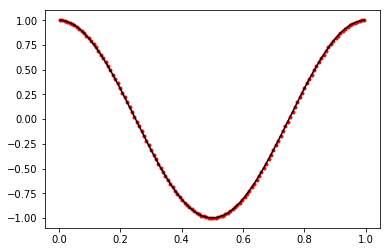

In [237]:
Us = np.genfromtxt('Prob1cell.csv', delimiter=',')
print("iterations: %d" % Us[-1])
print("residual: %g" % Us[-2])
Us = Us[:-2]
cells = len(Us)
h = 1/cells
print("cells: %d" % len(Us))
x = np.linspace(h/2,1-h/2,cells)
print("error: %g" % np.max(np.abs(Us - np.cos(2*np.pi*x))))
plt.plot(x,Us,'r.')
plt.plot(x, np.cos(2*np.pi*x), 'k-')

# Node Center

In [238]:
%%bash
make Prob1node
mpirun -n 4 ./Prob1node -m 7 -kmax 100000 -tol 1.00e-10 --loglevel debug > Prob1node.csv

mpicc -o Prob1node  -I/home/ruthvik/Desktop/Spring18/ME471-571/src -I/usr/include Prob1node.c /home/ruthvik/Desktop/Spring18/ME471-571/src/demo_util.c -lm


iterations: 51283
residual: 9.99842e-11
cells: 129
error: 0.000401561


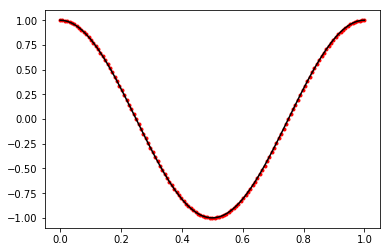

In [239]:
Us = np.genfromtxt('Prob1node.csv', delimiter=',')
print("iterations: %d" % Us[-1])
print("residual: %g" % Us[-2])
Us = Us[:-2]
cells = len(Us)
h = 1/cells
print("cells: %d" % len(Us))
x = np.linspace(0,1,cells)
print("error: %g" % np.max(np.abs(Us - np.cos(2*np.pi*x))))
plt.plot(x,Us,'r.')
plt.plot(x, np.cos(2*np.pi*x), 'k-')

# Problem 1(c)
# Cell Center

In [226]:
for pv in range(5,11):
    N=2**pv
    file = open("Cell_results_"+str(N)+".csv", "w")
    tr = %timeit -n 1 -r 1 -o w = p = subprocess.run(['/usr/bin/mpirun','-n', str(4),\
    './Prob1cell','-m',str(pv),"-kmax",str(10000000),"-tol",str(1.00e-10),"--loglevel", "debug"], stdout=file)
    file.close()

68.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
135 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
426 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
2.11 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
14.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1min 37s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [227]:
err=[]
for pv in range(5,11):
    N=2**pv
    Us = np.genfromtxt("Cell_results_"+str(N)+".csv", delimiter=',')
    Us = Us[:-2]
    cells = len(Us)
    h = 1/cells
    x = np.linspace(h/2,1-h/2,cells)
    error = np.max(np.abs(Us - np.cos(2*np.pi*x)))
    err.append(error)
    print(error)

0.004815273393786956
0.00120454386135882
0.0003011812704613037
7.529822749641202e-05
1.882478403936183e-05
4.706257074715836e-06


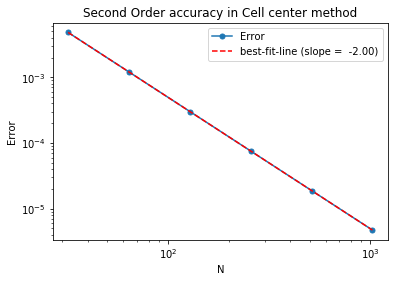

In [228]:
Nvec =[2**i for i in range(5,11)] 
loglog(Nvec,err,'.-',markersize=10)
xlabel('N')
ylabel('Error')
title('Second Order accuracy in Cell center method');

c = polyfit(log(Nvec),log(err),1)
loglog(Nvec,exp(polyval(c,log(Nvec))),'r--')
legend(["Error","best-fit-line (slope = {:6.2f})".format(c[0])])

# Problem 1(c)
# Node Center

In [229]:
for pv in range(5,11):
    N=2**pv
    file = open("Node_results_"+str(N)+".csv", "w")
    tr = %timeit -n 1 -r 1 -o w = p = subprocess.run(['/usr/bin/mpirun','-n', str(4),\
    './Prob1node','-m',str(pv),"-kmax",str(10000000),"-tol",str(1.00e-10),"--loglevel", "debug"], stdout=file)
    file.close()

143 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
97 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
446 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.94 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
9.69 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1min 5s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [230]:
err=[]
for pv in range(5,11):
    N=2**pv
    Us = np.genfromtxt("Node_results_"+str(N)+".csv", delimiter=',')
    Us = Us[:-2]
    cells = len(Us)
    h = 1/cells
    x = np.linspace(0,1,cells)
    error = np.max(np.abs(Us - np.cos(2*np.pi*x)))
    err.append(error)
    print(error)

0.006437923660050249
0.001607134574161062
0.00040156056344797797
0.00010006977266718842
2.3771791323623503e-05
1.12427237730639e-06


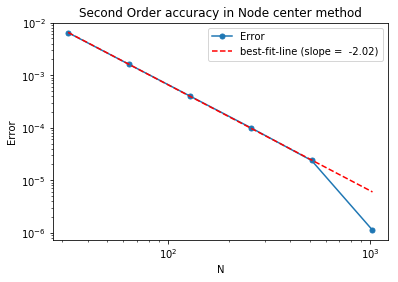

In [233]:
Nvec =[2**i for i in range(5,11)] 
loglog(Nvec,err,'.-',markersize=10)
xlabel('N')
ylabel('Error')
title('Second Order accuracy in Node center method');

c = polyfit(log(Nvec[:-1]),log(err[:-1]),1)
loglog(Nvec,exp(polyval(c,log(Nvec))),'r--')
legend(["Error","best-fit-line (slope = {:6.2f})".format(c[0])])

# Problem 1(d)

In [243]:
%%bash
make Prob1node
mpirun -n 4 ./Prob1node -m 7 -kmax 100000 -tol 1.00e-10 --loglevel debug > Prob1node1d.csv

mpicc -o Prob1node  -I/home/ruthvik/Desktop/Spring18/ME471-571/src -I/usr/include Prob1node.c /home/ruthvik/Desktop/Spring18/ME471-571/src/demo_util.c -lm


In [244]:
Us = np.genfromtxt('Prob1node1d.csv', delimiter=',')
print(Us)

[ 1.00000000e+00 -2.00763080e-04 -2.00763080e-04 -1.00040156e+00
 -1.00040156e+00 -2.00763080e-04 -2.00763080e-04  1.00000000e+00]


Notice that the solutions  at all internal processor boundaries are duplicated

    Personal Notes: See text art in the codes, Prob1cell.c and Prob1node.c for visualization of node center mesh and cell center mesh